In [2]:
# library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

# Underfitting and Overfitting: KNN  


Analyze data bankloan.csv
* Apply KNN Classifier
    * target : default
    * features : employ, debtinc, creddebt, othdebt
* Using different k (1,3,5,...100) : Apply scaling and Validate the model using accuracy in 20% testing data and 80% training data
* compare accuracies obtained from training data and testing data

In [3]:
bankloan= pd.read_csv('bankloan.csv')
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [4]:
x=bankloan[['employ','debtinc','creddebt','othdebt']]
y=bankloan['default']

## Splitting dataset

In [5]:
x_train, x_test, y_train, y_test= train_test_split(
    x,y,
    stratify=y,
    random_state=2020,
    test_size=.2
)

## Scaling

In [6]:
scaler= MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train) #langsung 2 step fitting dan transform # untuk data train
x_test_scaled=scaler.transform(x_test)

## model performance in difference n_neighbor

In [7]:
k= range(1,200,2)
testing_accuracy=[]
training_accuracy=[]
score=0

for i in k:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled,y_train)
    
    y_predict_train= knn.predict(x_train_scaled)
    training_accuracy.append(accuracy_score(y_train,y_predict_train))
    
    y_predict_test= knn.predict(x_test_scaled)
    acc_score= accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score<acc_score:
        score=acc_score
        best_n=i

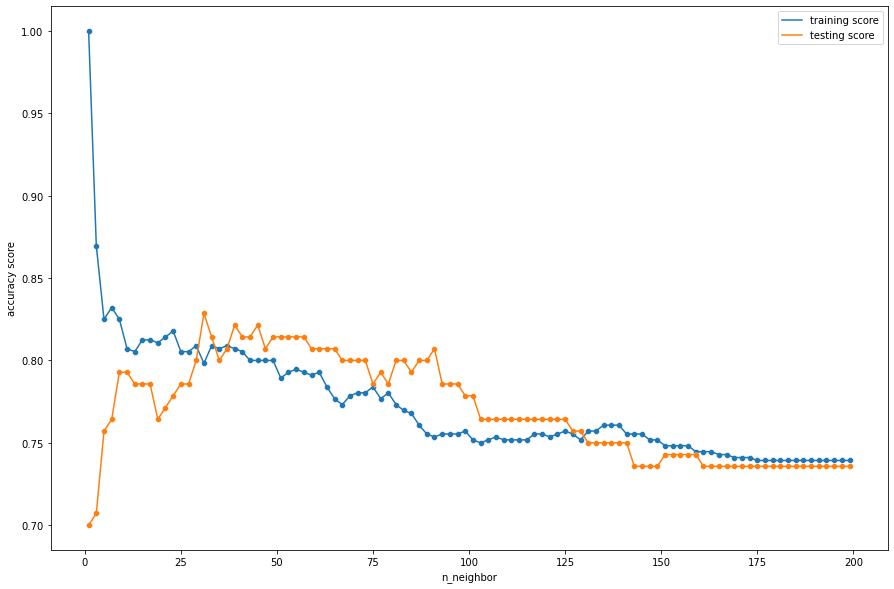

In [8]:
plt.figure(figsize=(15,10))

sns.lineplot(x=k,y=training_accuracy)
sns.lineplot(x=k, y=testing_accuracy)

sns.scatterplot(x=k, y=training_accuracy)
sns.scatterplot(x=k,y=testing_accuracy)

plt.legend(['training score','testing score'])
plt.xlabel('n_neighbor')
plt.ylabel('accuracy score')
plt.show()

In [9]:
print('best k:',best_n,'\nbest score:',score)

best k: 31 
best score: 0.8285714285714286


Dari grafik di atas, bisa dilihat bahwa, ketika nilai n_neighbor terlalu kecil, maka ada kecenderungan untuk overfitting.  
Sebaliknya, ketika nilai n_neighbor terlalu tinggi, ada kecenderungan underfitting.

_Sweet spot_ pada grafik di atas ada di n_neighbor= 31, dengan testing score= 82.86%

# Model Complexity: Decision Tree Classifier  

Analyze data bankloan.csv
* Apply Decision Tree Classifier
    * target : default
    * features : employ, debtinc, creddebt, othdebt
* Using different maximum depth of the tree (1,2,3,...25) : Validate the model using accuracy in 20% testing data and 80% training data
* compare accuracies obtained from training data and testing data
* you may try another hyperparameter such as minimum samples split, minimum samples leaf, etc.

## Model Performance with different max depth

In [10]:
depth= range(1,25)
testing_accuracy=[]
training_accuracy=[]
score=0

for i in depth:
    tree=DecisionTreeClassifier(max_depth=i)
    tree.fit(x_train,y_train)
    
    y_predict_train= tree.predict(x_train)
    training_accuracy.append(accuracy_score(y_train,y_predict_train))
    
    y_predict_test= tree.predict(x_test)
    acc_score= accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score<acc_score:
        score=acc_score
        best_depth=i

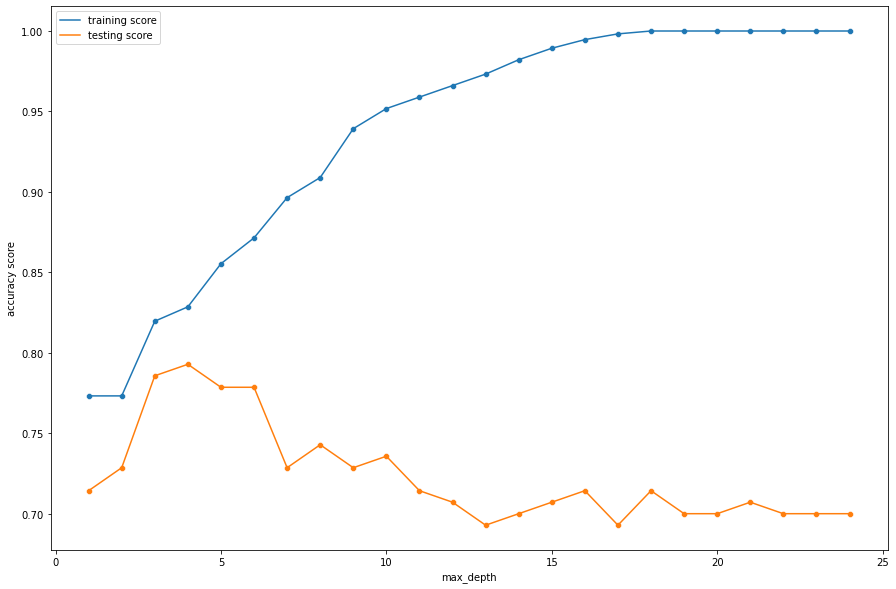

In [11]:
plt.figure(figsize=(15,10))

sns.lineplot(x=depth,y=training_accuracy)
sns.lineplot(x=depth, y=testing_accuracy)

sns.scatterplot(x=depth, y=training_accuracy)
sns.scatterplot(x=depth, y=testing_accuracy)

plt.legend(['training score','testing score'])
plt.xlabel('max_depth')
plt.ylabel('accuracy score')
plt.show()

In [12]:
print('max depth:', best_depth, '\nbest score:',score)

max depth: 4 
best score: 0.7928571428571428


Semakin tinggi max depth, maka semakin tinggi kecenderungan untuk overfitting. Bisa dilihat di grafik di atas, ketika max depth= 25, maka performa model di data train hampir 100%, sementara pada data test hanya di sekitar 70%.  

Overfitting pada decision tree dengan max depth tinggi disebabkan oleh kompleksnya model pohon keputusan.

In [13]:
from sklearn.tree import plot_tree

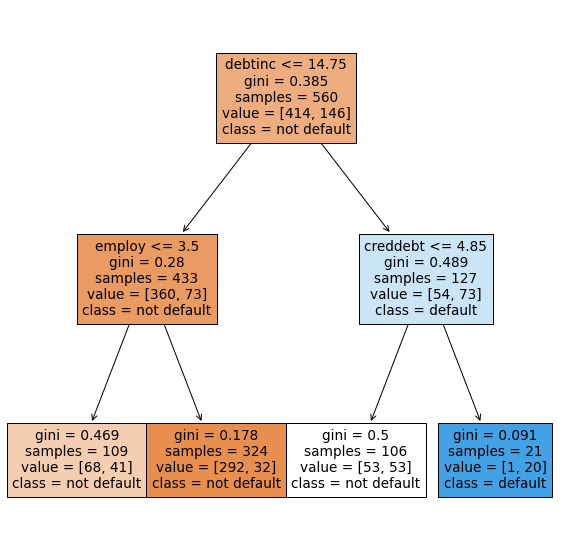

In [14]:

tree= DecisionTreeClassifier(max_depth=2)
tree.fit(x_train,y_train)

plt.figure(figsize=(10,10))
plot_tree(tree, feature_names=list(x), class_names=['not default', 'default'], filled= True)
plt.show()

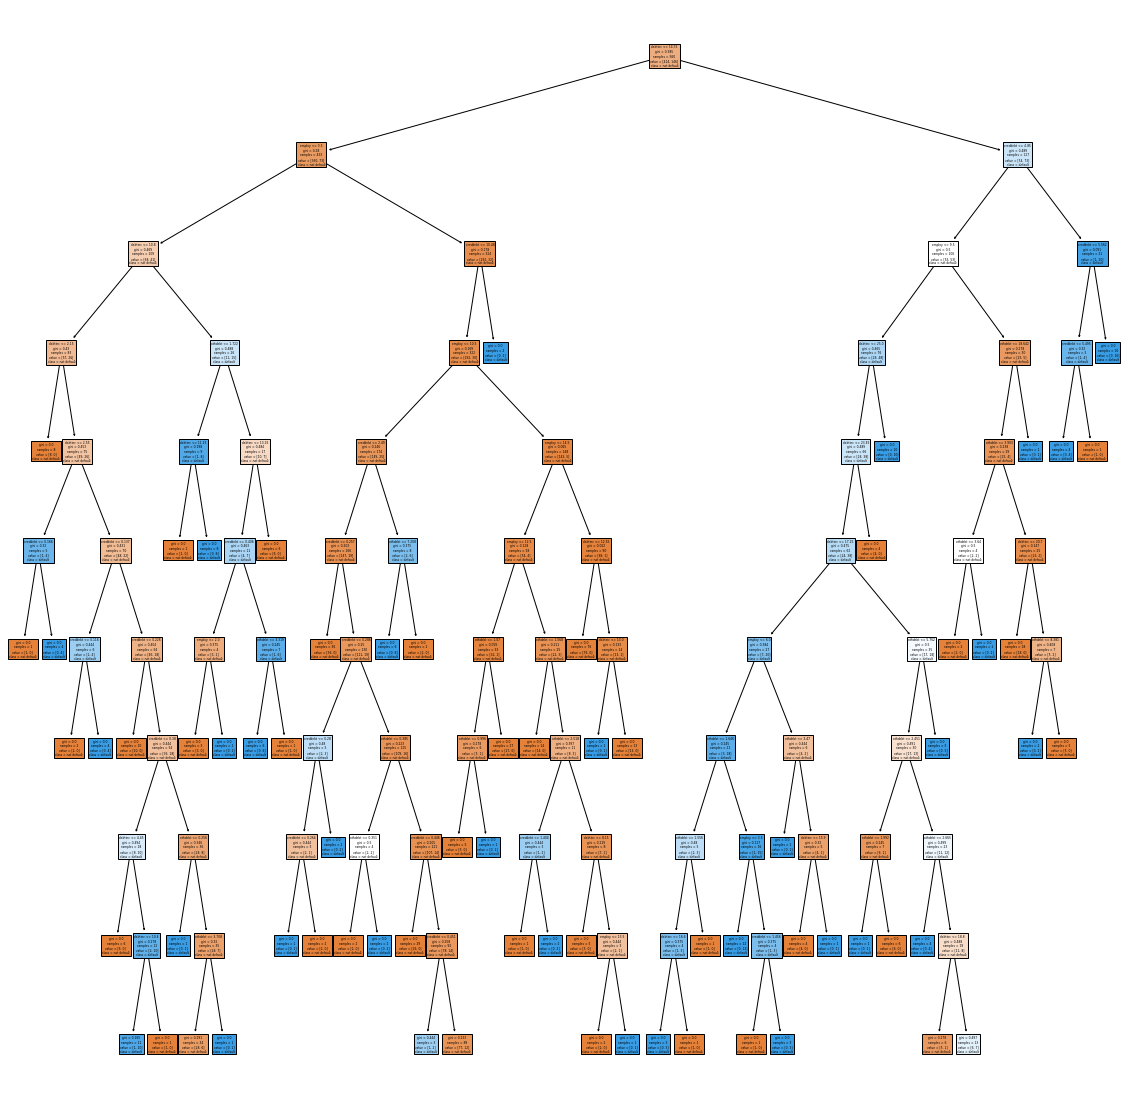

In [15]:
tree= DecisionTreeClassifier(max_depth=10)
tree.fit(x_train,y_train)

plt.figure(figsize=(20,20))
plot_tree(tree, feature_names=list(x), class_names=['not default', 'default'], filled= True)
plt.show()

#pohon keputusan jauh lebih kompleks

# Latihan

Buatlah model Decision Tree Classifier
* Data Bankloan
    * x:employ, debtinc, creddebt, othdebt
    * y: default
* Gunakan parameter berikut:
    * min_samples_split
    * min_samples_leaf
* Buat dengan berbagai nilai paramater

1. Coba jelaskan apa yang dilakukan masing-masing parameter (min_sample_split dan min_sample_leaf) terhadap model decision tree classifier.

2. Apa pengaruh masing-masing parameter terhadap kompleksitas model dan generalisasi model. (pada nilai parameter seperti apa model overfit dan underfit)

In [23]:
depth= range(1,75)
testing_accuracy=[]
training_accuracy=[]
score=0

for i in depth:
    tree=DecisionTreeClassifier(min_samples_leaf=i)
    tree.fit(x_train,y_train)
    
    y_predict_train= tree.predict(x_train)
    training_accuracy.append(accuracy_score(y_train,y_predict_train))
    
    y_predict_test= tree.predict(x_test)
    acc_score= accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score<acc_score:
        score=acc_score
        best_depth=i

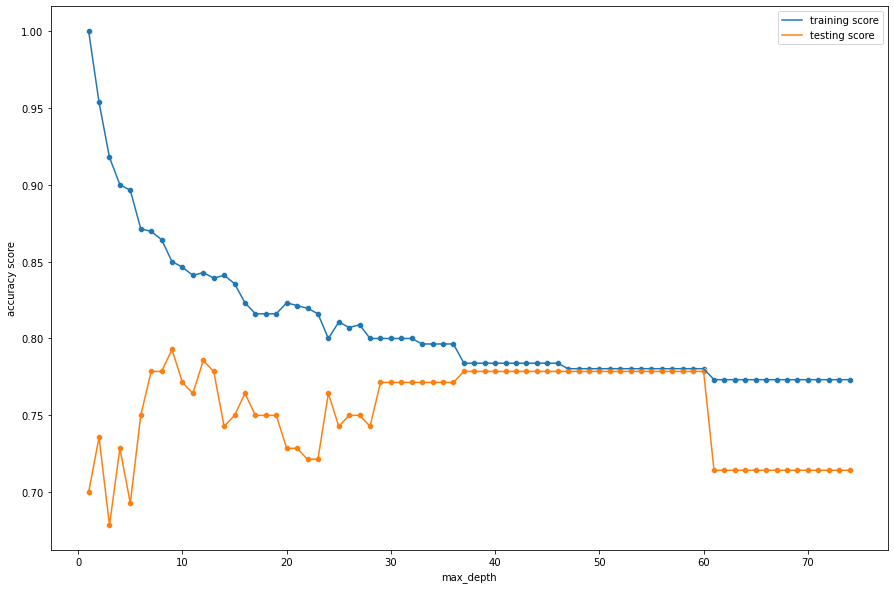

In [24]:
plt.figure(figsize=(15,10))

sns.lineplot(x=depth,y=training_accuracy)
sns.lineplot(x=depth, y=testing_accuracy)

sns.scatterplot(x=depth, y=training_accuracy)
sns.scatterplot(x=depth, y=testing_accuracy)

plt.legend(['training score','testing score'])
plt.xlabel('max_depth')
plt.ylabel('accuracy score')
plt.show()

In [25]:
depth= range(2,300)
testing_accuracy=[]
training_accuracy=[]
score=0

for i in depth:
    tree=DecisionTreeClassifier(min_samples_split=i)
    tree.fit(x_train,y_train)
    
    y_predict_train= tree.predict(x_train)
    training_accuracy.append(accuracy_score(y_train,y_predict_train))
    
    y_predict_test= tree.predict(x_test)
    acc_score= accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score<acc_score:
        score=acc_score
        best_depth=i

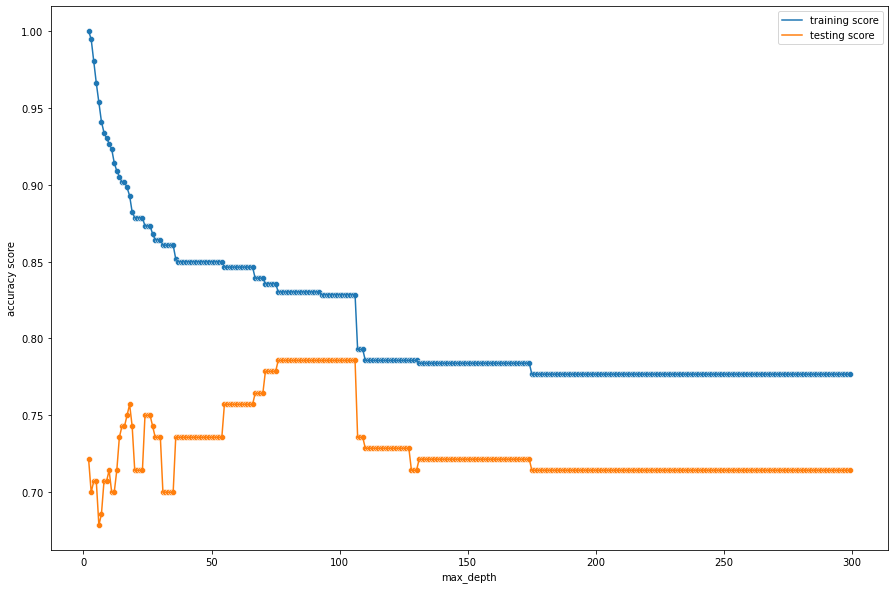

In [22]:
plt.figure(figsize=(15,10))

sns.lineplot(x=depth,y=training_accuracy)
sns.lineplot(x=depth, y=testing_accuracy)

sns.scatterplot(x=depth, y=training_accuracy)
sns.scatterplot(x=depth, y=testing_accuracy)

plt.legend(['training score','testing score'])
plt.xlabel('max_depth')
plt.ylabel('accuracy score')
plt.show()